# Análisis Exploratorio de Datos
## Thomas Useche Alvarez

DataSet: https://www.kaggle.com/competitions/titanic/data


El objetivo de este proyecto es hacer un EDA (Exploratory Data Analisys) sobre los datos que hay sobre el Titanic, entender y descubrir que variables están asociadas con los supervivientes.

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploración de Inicial de Datos

In [116]:
datos = pd.read_csv('train.csv')
datos.info()
datos.shape
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Con el primer análisis podemos saber que hay 12 variables disponibles, 891 pasajeros y todos los tipos de datos, numéricos, categóricos y binarios, posteriormente se modificarán y eliminarán algunas categorias con el fin de ejecutar un mejor análisis.

In [117]:
datos.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Con el primer análisis estadístico sabemos que la edad media es de 30 años, con una dispersión de 14.5, por lo que la mayoría de los pasajeros están entre los 15 y 44 años

## Limpieza de Datos

In [118]:
datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Gracias a esto, sabemos que hay varios datos faltantes distribiudos en las variables, sin embargo, en el caso de la edad, al faltar un 20% de datos faltantes, se rellanarán con la media (29.6), para los datos de cabina, al faltar gran parte de los datos, se eliminará la columna, en el caso del embarque, al faltar 2 datos se rellenarán con la moda.

In [119]:
datos['Age'].fillna(datos['Age'].median(), inplace=True)
datos.drop('Cabin', axis=1, inplace=True)

mode_embarked = datos['Embarked'].mode()[0]
datos['Embarked'].fillna(mode_embarked, inplace=True)

C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\1461862220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Age'].fillna(datos['Age'].median(), inplace=True)
C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\1461862220.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

### Eliminacion de columnas irrelevantes

In [120]:
datos.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

Se hace una correción de la categoria de los datos, Es importante para tratarlos mejor en graficos o modelos.

In [121]:
datos['Pclass'] = datos['Pclass'].astype('category')
datos['Sex'] = datos['Sex'].astype('category')
datos['Embarked'] = datos['Embarked'].astype('category')


Una vez hecha la limpieza de datos, podemos comenzar a trabajar con ellos para hacer el analisis de los datos.

## Analisis Univariado

Para los primeros de datos se usa un histograma con el fin de ver los datos de edad de una manera más detallada, agrupandola en rangos de 10 años por barra.

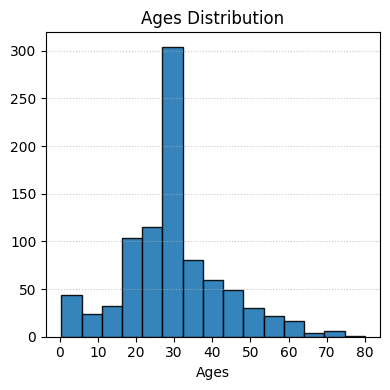

In [122]:

hist_edad = (datos['Age']).plot.hist(bins=15,figsize=(4,4), edgecolor='black', alpha=0.9)

plt.title('Ages Distribution')
plt.xlabel('Ages')
plt.ylabel('')

plt.xticks(np.arange(0,datos['Age'].max()+10,10))

plt.grid(axis='y', linestyle='dotted', alpha=0.7)

plt.tight_layout()
plt.show()

Confirmamos los datos vistos en el análisis previo y sabemos que la gran parte de las personas están entre los 25/35 años

Text(0.5, 0, 'Passager Class')

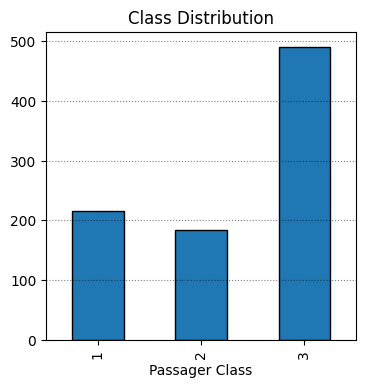

In [123]:
pclassCounts = datos['Pclass'].value_counts().sort_index()
pclassCounts.plot.bar(figsize=(4,4), edgecolor='black')
plt.grid(axis='y', linestyle='dotted', alpha=0.5, color='black')
plt.title('Class Distribution')
plt.xlabel('Passager Class')



<Axes: xlabel='Sex'>

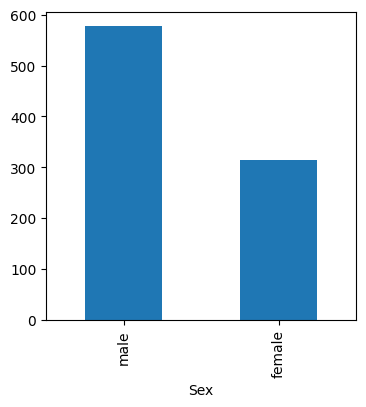

In [124]:
sexCount = datos['Sex'].value_counts()
sexCount.plot.bar(figsize=(4,4))

<Axes: xlabel='Embarked'>

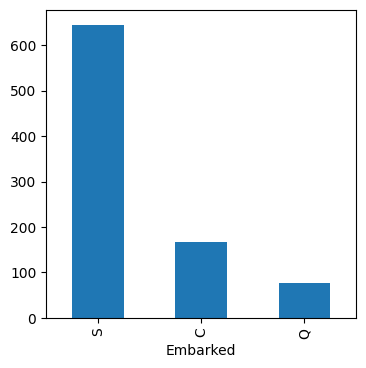

In [125]:
embarkedCount = datos['Embarked'].value_counts()
embarkedCount.plot.bar(figsize=(4,4))

## Análisis Bivarado

Ahora sabemos que habían más hombres, la edad más comun era de 30 años y la mayoria de ellos embarcaron en el puerto S, sabiendo estos datos, podemos seguir con la comparación de estas varaibles según los supervivientes, con el fin de encontrar alguna relación.

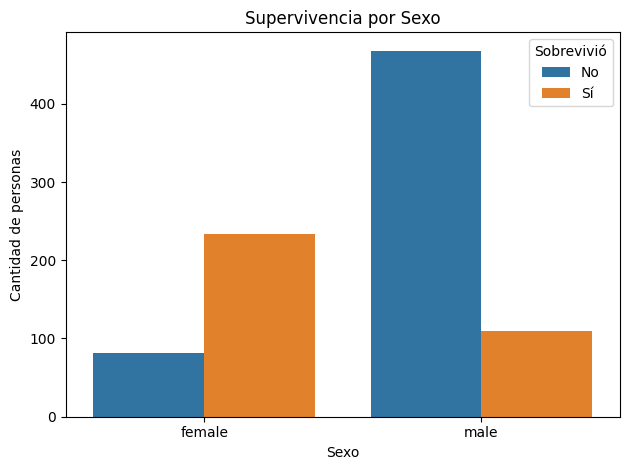

In [126]:
sns.countplot(data=datos, x='Sex', hue='Survived')
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')

plt.legend(title='Sobrevivió', labels=['No', 'Sí'])



plt.tight_layout()
plt.show()

C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\2973950871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_supervivencia = datos.groupby('Sex')['Survived'].mean().reset_index()
C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\2973950871.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mujer', 'Hombre'])


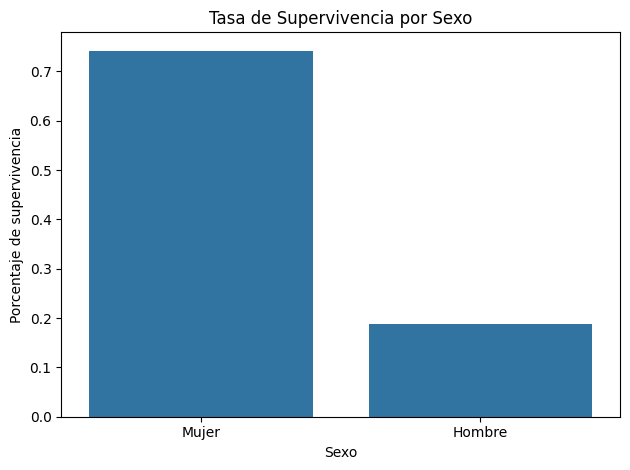

In [127]:

tasa_supervivencia = datos.groupby('Sex')['Survived'].mean().reset_index()

ax = sns.barplot(data=tasa_supervivencia, x='Sex', y='Survived')
ax.set_title('Tasa de Supervivencia por Sexo')
ax.set_ylabel('Porcentaje de supervivencia')
ax.set_xlabel('Sexo')


ax.set_xticklabels(['Mujer', 'Hombre'])

plt.tight_layout()
plt.show()

C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\2269876905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_clase = datos.groupby('Pclass')['Survived'].mean().reset_index()


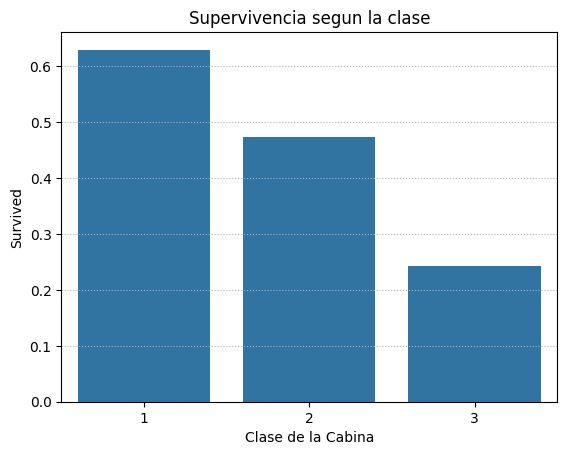

In [128]:
tasa_clase = datos.groupby('Pclass')['Survived'].mean().reset_index()

graph_tasa_clase = sns.barplot(data=tasa_clase, x='Pclass', y='Survived')
graph_tasa_clase.set_title('Supervivencia segun la clase')
graph_tasa_clase.set_xlabel('Clase de la Cabina')
graph_tasa_clase.yaxis.grid(True,linestyle='dotted')

C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\623980797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasaEmbarque = datos.groupby('Embarked')['Survived'].mean().reset_index()


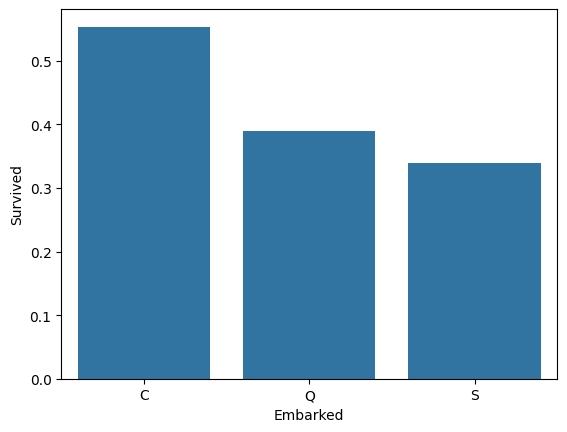

In [129]:
tasaEmbarque = datos.groupby('Embarked')['Survived'].mean().reset_index()

GraptasaEmbarque = sns.barplot(data=tasaEmbarque, x='Embarked', y='Survived')

C:\Users\Thoma\AppData\Local\Temp\ipykernel_8624\740515848.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasaEdad = datos.groupby('grupoEdad')['Survived'].mean().reset_index()


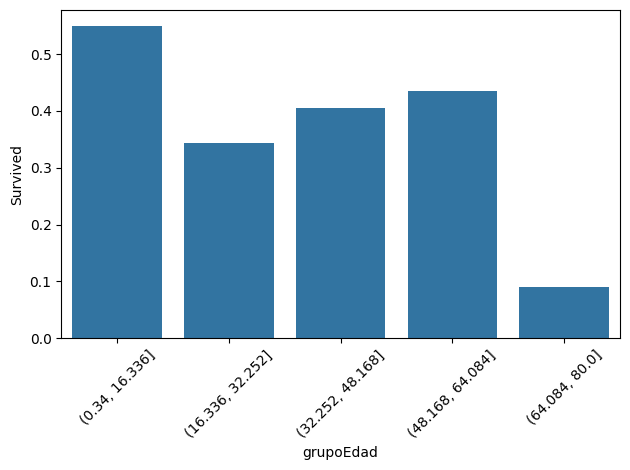

In [130]:
grupoEdad = pd.cut(datos['Age'], 5)

datos['grupoEdad'] = grupoEdad
tasaEdad = datos.groupby('grupoEdad')['Survived'].mean().reset_index()
tasaEdadGra = sns.barplot(data=tasaEdad, x='grupoEdad', y='Survived')

plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

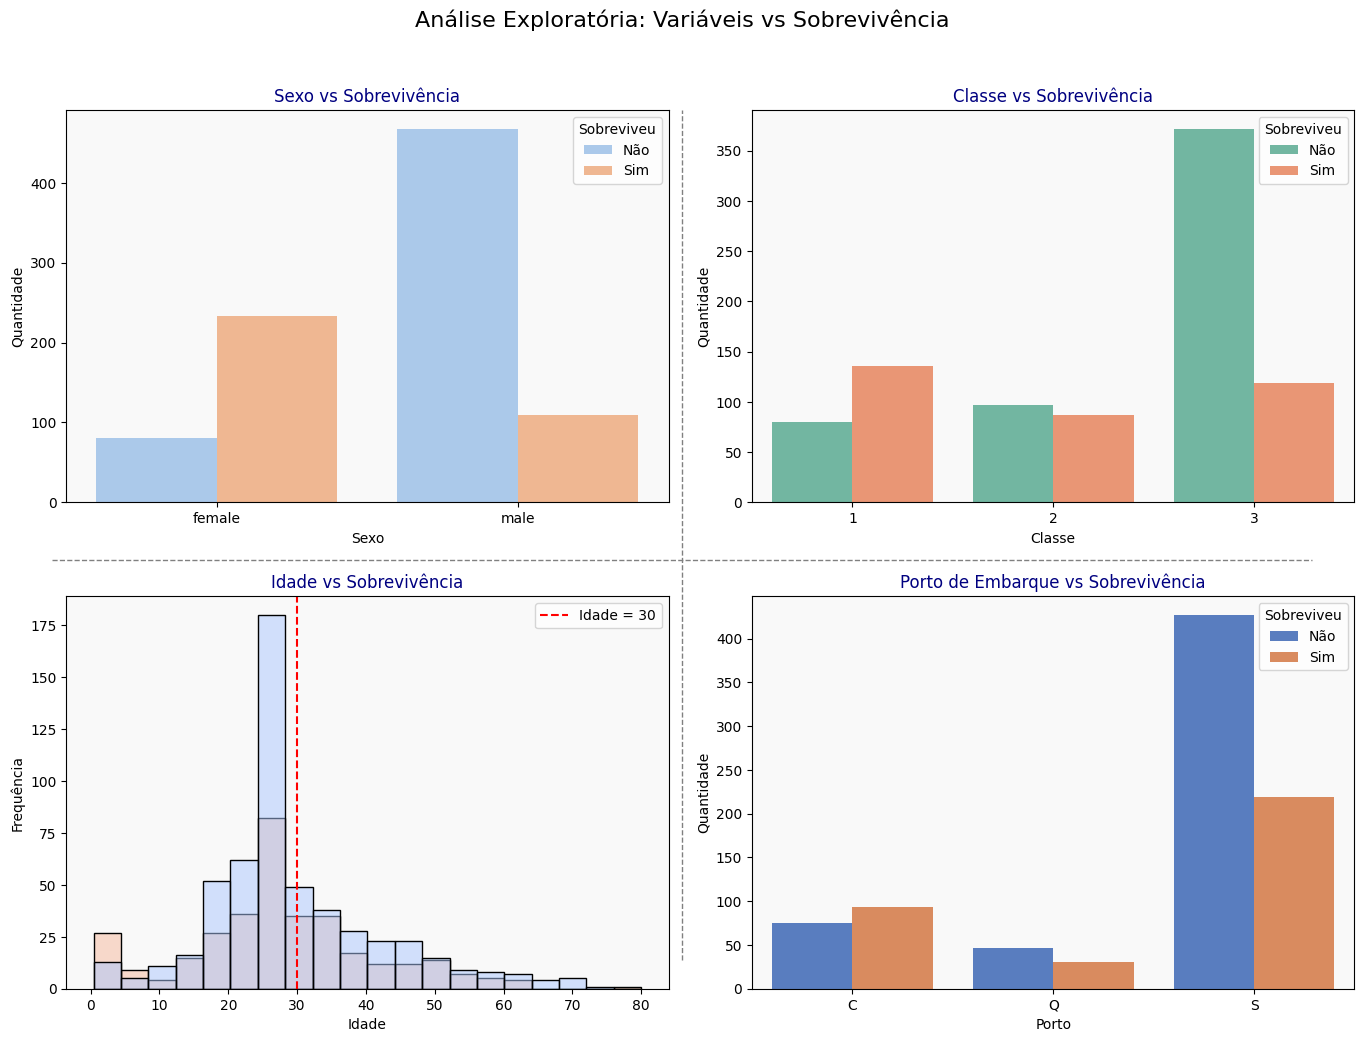

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Traducir 'Survived' a una nueva columna
datos['Sobreviveu'] = datos['Survived'].map({0: 'Não', 1: 'Sim'})

# 🎨 Crear figura con 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 🔹 Sexo vs Sobrevivência
sns.countplot(x='Sex', hue='Sobreviveu', data=datos, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Sexo vs Sobrevivência', fontsize=12, color='navy')
axes[0, 0].set_xlabel('Sexo')
axes[0, 0].set_ylabel('Quantidade')
axes[0, 0].legend(title='Sobreviveu', loc='upper right')
axes[0, 0].set_facecolor('#f9f9f9')

# 🔹 Classe vs Sobrevivência
sns.countplot(x='Pclass', hue='Sobreviveu', data=datos, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Classe vs Sobrevivência', fontsize=12, color='navy')
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Quantidade')
axes[0, 1].legend(title='Sobreviveu', loc='upper right')
axes[0, 1].set_facecolor('#f9f9f9')

# 🔹 Idade vs Sobrevivência
sns.histplot(x='Age', hue='Sobreviveu', data=datos, bins=20, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Idade vs Sobrevivência', fontsize=12, color='navy')
axes[1, 0].set_xlabel('Idade')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].axvline(x=30, color='red', linestyle='--', label='Idade = 30')
axes[1, 0].legend()
axes[1, 0].set_facecolor('#f9f9f9')

# 🔹 Porto de Embarque vs Sobrevivência
sns.countplot(x='Embarked', hue='Sobreviveu', data=datos, palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Porto de Embarque vs Sobrevivência', fontsize=12, color='navy')
axes[1, 1].set_xlabel('Porto')
axes[1, 1].set_ylabel('Quantidade')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].set_facecolor('#f9f9f9')

# 🎯 Añadir líneas divisorias a la figura
fig.add_artist(plt.Line2D([0.05, 0.95], [0.5, 0.5], color='gray', linewidth=1, linestyle='--'))  # línea horizontal
fig.add_artist(plt.Line2D([0.5, 0.5], [0.1, 0.95], color='gray', linewidth=1, linestyle='--'))  # línea vertical

# 🧼 Ajustar espacio y título general
plt.tight_layout(pad=2.0)
fig.suptitle('Análise Exploratória: Variáveis vs Sobrevivência', fontsize=16, y=1.05)

plt.show()


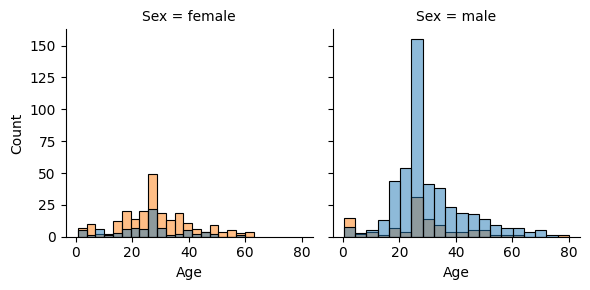

In [132]:
g = sns.FacetGrid(datos, col='Sex')
g.map_dataframe(sns.histplot, x='Age', hue='Survived', bins=20)


In [131]:
corrSexSurv = datos[['Age', 'Survived']]
matrizcorr = corrSexSurv.corr()
print(matrizcorr)


              Age  Survived
Age       1.00000  -0.06491
Survived -0.06491   1.00000
